In [178]:
# Setting up by importing all the relevant libraries
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import cm
import nltk
import re

%matplotlib notebook

In [167]:
# Setting parameters
dir = r'C:\Users\ankuarora\Desktop\Client\2017_05_CogEx\2017_07_R2Implementation\Sprint 7\1CreateTrainData'
features_file = 'features_annotated.csv'

In [168]:
# Read the features csv created in the previous step, including manual annotation
features = pd.read_csv(os.path.join(dir, features_file), quotechar='"', index_col = 'filename', encoding='utf-8')
features['body'] = [1 if type == 'Body' else 0 for type in features['type']]

In [169]:
features

,width,height,seq_from_top,seq_from_bottom,width_prv,height_prv,width_nxt,height_nxt,text,type,body
filename,,,,,,,,,,,
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice1.jpg,0.437931,0.030338,1,10,0.000000,0.000000,0.256897,0.022170,sample proposal letter,Header,0
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice2.jpg,0.256897,0.022170,2,9,0.437931,0.030338,0.146552,0.021004,(on you gow tertcad,Header,0
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice3.jpg,0.146552,0.021004,3,8,0.256897,0.022170,0.158621,0.078180,"march 0, 2008",Date,0
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice4.jpg,0.158621,0.078180,4,7,0.146552,0.021004,0.158621,0.021004,ns. jane beiey june's paza 12 man steet broms...,Addressee,0
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice5.jpg,0.158621,0.021004,5,6,0.158621,0.078180,0.960345,0.159860,dear ms. paley,Salutation,0
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice6.jpg,0.960345,0.159860,6,5,0.158621,0.021004,0.970690,0.158693,iam pleased to mile jane's pazn's to become th...,Body,1
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice7.jpg,0.970690,0.158693,7,4,0.960345,0.159860,0.093103,0.019837,we wilecoqnice your suppor on our promotonel y...,Body,1
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice8.jpg,0.093103,0.019837,8,3,0.970690,0.158693,0.237931,0.059510,"srce,",Closure,0
2012ccf11ce565a8e1877fdc8eb9c9d7--sample-business-proposal-proposal-sample_slice9.jpg,0.237931,0.059510,9,2,0.093103,0.019837,0.868966,0.022170,nat laver féends of t. james park rigsss 212,Sender,0


<IPython.core.display.Javascript object>


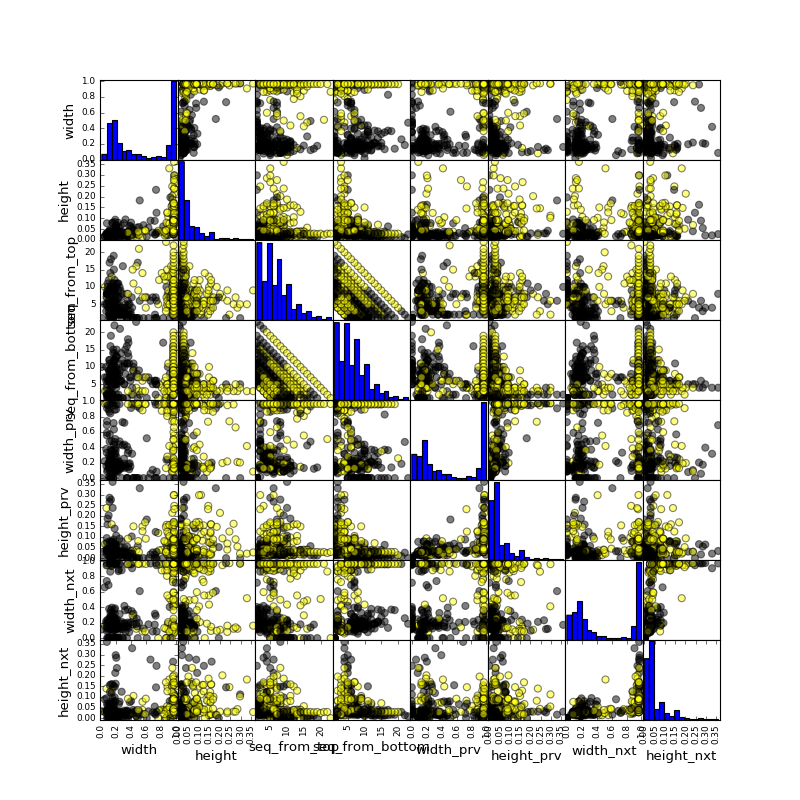

In [170]:
# Understand distrbution of layout features wrt section type
X = features[['width', 'height', 'seq_from_top', 'seq_from_bottom', 'width_prv', 'height_prv', 'width_nxt', 'height_nxt']]
y = features['body']
# X_train, X_test, y_train, y_test = train_test_split(X, y)

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s = 40, hist_kwds = {'bins':15}, 
                            figsize = (10,10), cmap = cmap)

In [171]:
np.isnan?

In [172]:
# Clean the omr text to prepare for creating text features
stop = set(nltk.corpus.stopwords.words('english'))
wnl = nltk.WordNetLemmatizer()
word_corpus = []
for _, row in features.iterrows():
    if pd.isnull(row['text']):
        continue
    tokens = nltk.word_tokenize(row['text']) # tokenize
    tokens = [i for i in tokens 
              if i not in stop 
              if i.isalnum()
              if len(i) > 2
             ] # stopword removal & text cleaning
    tokens_lemma = [wnl.lemmatize(t) for t in tokens] # lemmatization
    for word in tokens_lemma:
        word_corpus.append(word)

In [174]:
all_words = nltk.FreqDist(w for w in word_corpus)
word_features = [w[0] for w in all_words.most_common(5)]
print(word_features)

['letter', 'sample', 'also', 'new', 'sale']


In [187]:
for key, row in features.iterrows():
    for word in word_features:
        if pd.isnull(row['text']):
            continue
        features.loc[key,('count({})'.format(word))] = sum(1 for _ in re.finditer(r'\b%s\b' % re.escape(word), row['text']))

In [190]:
# Dump the feature space as csv for model training
features.to_csv('feature_space.csv')

print ("Feature space exported successfully")

Feature space exported successfully
